In [13]:
import numpy as np
from numpy.linalg import inv as inverse
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import sympy as sy
import prettyplotlib as ppl
import pickle
import itertools

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

import uncertainties as uc
import uncertainties.unumpy as un


sns.set_style(style='white')
fontsize_labels = 22    # size used in latex document
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['axes.titlesize'] = fontsize_labels
rcParams['figure.figsize'] = (3*6.2, 3*3.83)  # in inches; width corresponds to \textwidth in latex document (golden ratio)

chars=["Electrons","Muons","Taons","Hadrons"]

In [8]:
error_on_fit 

array([[ 0.0134445 ,  0.00514565,  0.00867694,  0.06697518],
       [ 0.0134769 ,  0.00515903,  0.00869851,  0.06712598],
       [ 0.01350939,  0.00517245,  0.00872015,  0.06727717],
       ..., 
       [ 0.01925924,  0.00760367,  0.01269167,  0.09926379],
       [ 0.0192134 ,  0.00758316,  0.01265958,  0.09903919],
       [ 0.01916766,  0.00756271,  0.01262758,  0.09881506]])

gamma_e 	 0.085+/-0.004
gamma_h 	 1.75+/-0.09
gamma_Z 	 2.553+/-0.020
gamma_m 	 0.082+/-0.004
Mz      	 91.185+/-0.008
gamma_t 	 0.081+/-0.004


/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


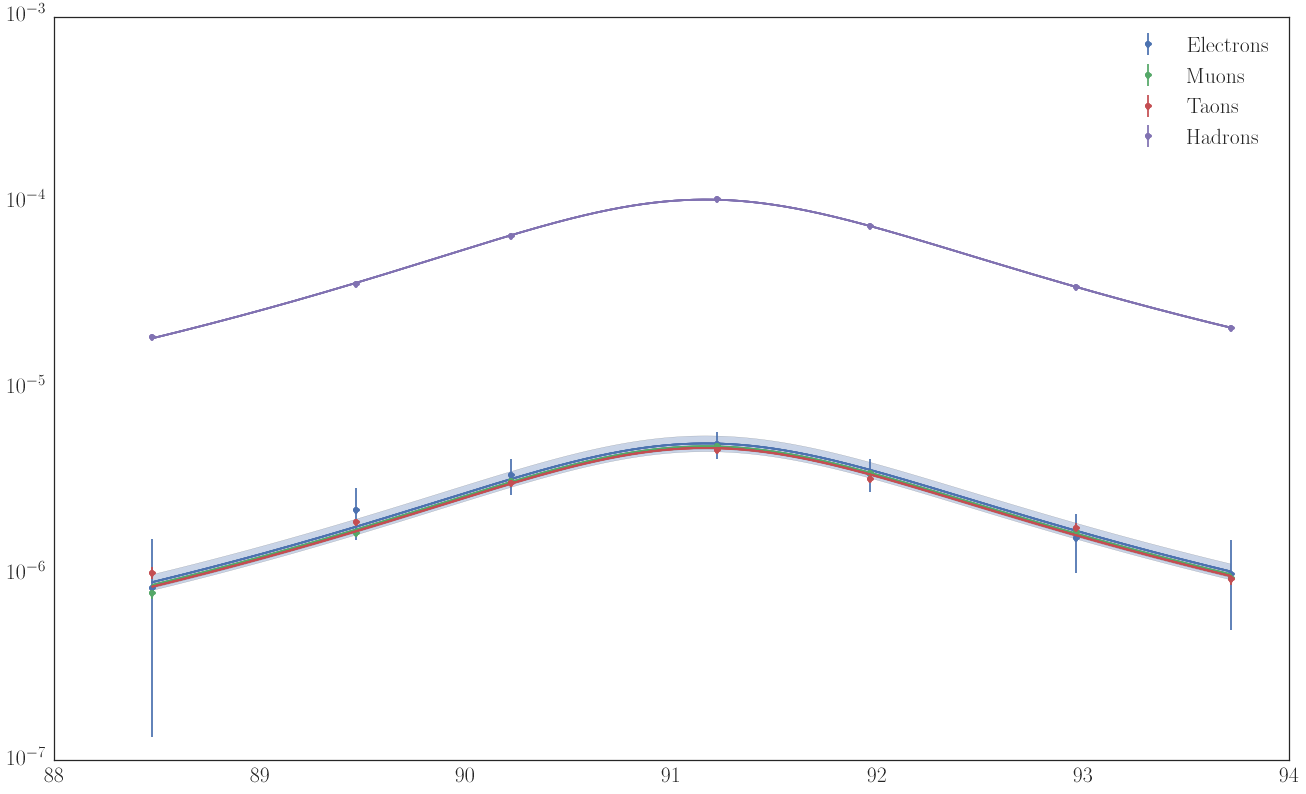

In [28]:
crosssections = pickle.load( open("data/crosssection.p","rb"))
cross_total = un.nominal_values(list(crosssections.values()))
cross_total_error = un.std_devs(list(crosssections.values()))

E = (np.array(4*list(crosssections.keys())).reshape(4,7).swapaxes(0,1))


def Breit_Wigner(s,p):
    gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p
    gamma_f = np.array([gamma_e,gamma_m,gamma_t,gamma_h])
    return 12*np.pi / Mz**2 * (gamma_e*gamma_f*s)/((s - Mz**2)**2 +(s*gamma_Z/Mz)**2)


p0 = [80,80,80,1600,2.5,90]

def residuals(p):
    return (cross_total - Breit_Wigner(E**2,p)).flatten()

def residuals_weighted(p,error):
    weights = 1 / error
    return (weights*(cross_total - Breit_Wigner(E**2,p))).flatten()

p,cov,infodict,mesg,ier = leastsq(residuals_weighted,p0,args=cross_total_error,full_output=True)
len_data = len(residuals(p))
chi_sq = (residuals(p)**2).sum()/(len_data-len(p))
p_uc = uc.correlated_values(p, cov)
keys = ["gamma_e", "gamma_m","gamma_t","gamma_h","gamma_Z","Mz     "]
params = dict(zip(keys,p_uc))
gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p_uc

for k in params:
    print(k,"\t",params[k])
f, ax1 = plt.subplots(1, 1)
palette = itertools.cycle(sns.color_palette())

E_ = np.array([np.linspace(np.min(E),np.max(E),1000)]*4).swapaxes(0,1)
data_fit = Breit_Wigner(E_**2,p)
error_mat = Breit_Wigner(E_**2,p_uc)
error_on_fit = np.array([un.std_devs(error_mat[:,k]) for k in range(4)]).swapaxes(0,1)   
data_fit_min = data_fit - error_on_fit
data_fit_max = data_fit + error_on_fit

for k in range(4):
    color=next(palette)
    ax1.errorbar(E[:,0], cross_total[:,k],color=color, label = chars[k],yerr=cross_total_error[:,k],fmt='o') 
    
    ax1.plot(E_,data_fit[:,k],color=color)
    ax1.fill_between(E_[:,0], 1.0*data_fit_min[:,k] , 1.0*data_fit_max[:,k], facecolor=color, alpha=0.3 )

p_lit = [83.39,83.39,83.39,1670,2.4,91.187]
data_fit = Breit_Wigner(E_**2,p_lit)

    
ax1.set_yscale("log")
ax1.legend()
plt.show()

In [57]:
s= " \t  "
for i in range(6):
    s+=keys[i]+ " \t"
print(s)
for i,row in enumerate(cov):
    s=    keys[i]+" | "
    for item in row:
        s+= "%.5f \t"%item
    print(s)

 	  gamma_e 	gamma_m 	gamma_t 	gamma_h 	gamma_Z 	Mz      	
gamma_e | 0.00004 	-0.00004 	-0.00004 	-0.00082 	0.00001 	0.00000 	
gamma_m | -0.00004 	0.00004 	0.00004 	0.00082 	0.00001 	0.00000 	
gamma_t | -0.00004 	0.00004 	0.00005 	0.00094 	0.00001 	0.00000 	
gamma_h | -0.00082 	0.00082 	0.00094 	0.01737 	0.00017 	0.00003 	
gamma_Z | 0.00001 	0.00001 	0.00001 	0.00017 	0.00031 	0.00004 	
Mz      | 0.00000 	0.00000 	0.00000 	0.00003 	0.00004 	0.00005 	


# Leptonuniversality

In [26]:
V_mu = gamma_m / gamma_e
print(V_mu)

0.79+/-0.14


In [27]:
V_tau = gamma_t / gamma_e

In [28]:
print(V_tau)

0.72+/-0.13


# Number of Neutrino families

In [55]:
gamma_nu = 1000*gamma_Z - gamma_e - gamma_m - gamma_t - gamma_h
print(gamma_nu/(3*250))

2.80+/-0.12


In [65]:
cross_total_error

array([[ 0.02782197,  0.02787407,  0.02444231,  0.22967047],
       [ 0.02785344,  0.00615895,  0.0097714 ,  0.05081131],
       [ 0.02848529,  0.01084485,  0.0129525 ,  0.08831717],
       [ 0.03258045,  0.02197724,  0.02034163,  0.17358069],
       [ 0.02875475,  0.02774167,  0.02439848,  0.2334994 ],
       [ 0.02325308,  0.01779787,  0.01554418,  0.13873916],
       [ 0.01934437,  0.01088424,  0.0105085 ,  0.08941317]])

In [10]:
x = uc.ufloat(1,0.1)

In [11]:
x.__str__()

'1.00+/-0.10'

In [14]:
A = np.zeros([10,10])
As = np.zeros([10,10])
mat = un.umatrix(A,As)

In [17]:
x = un.uarray(np.random.random([10]),0.1*np.random.random(10))

In [23]:
mat[0,:]= x[:]

In [28]:
np.sum(mat[0,:])

4.166136572856776+/-0.18462829303989287

In [29]:
Q = np.load("data/C_eff.npy")

In [42]:
np.dot(mat,x)[0,1]

0.0+/-0

In [59]:
cross_total

array([[[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174]],

       [[  3.35336208,   0.19795542,   0.52606954,   5.43977027]],

       [[  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649]],

       [[  3.85349824,   0.89022997,   0.93917095,  18.08119762]],

       [[  3.38686697,   1.16711439,   1.13959833,  24.3054781 ]],

       [[  2.6404849 ,   0.64783039,   0.80622629,  13.84393773]],

       [[  2.44234359,   0.42797586,   0.65093952,   9.77715302]]])

In [66]:
cc = np.array(cross_total)

In [68]:
cc.reshape(7,4)

array([[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174],
       [  3.35336208,   0.19795542,   0.52606954,   5.43977027],
       [  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649],
       [  3.85349824,   0.89022997,   0.93917095,  18.08119762],
       [  3.38686697,   1.16711439,   1.13959833,  24.3054781 ],
       [  2.6404849 ,   0.64783039,   0.80622629,  13.84393773],
       [  2.44234359,   0.42797586,   0.65093952,   9.77715302]])

In [69]:
cc

array([[[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174]],

       [[  3.35336208,   0.19795542,   0.52606954,   5.43977027]],

       [[  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649]],

       [[  3.85349824,   0.89022997,   0.93917095,  18.08119762]],

       [[  3.38686697,   1.16711439,   1.13959833,  24.3054781 ]],

       [[  2.6404849 ,   0.64783039,   0.80622629,  13.84393773]],

       [[  2.44234359,   0.42797586,   0.65093952,   9.77715302]]])

In [75]:
x[0]*=10

In [76]:
x

array([53.24832527700394+/-0.44461033690990526,
       0.4181668599823981+/-0.056231755988155635,
       0.707794603248798+/-0.07266988316664731,
       0.15230694660358957+/-0.020929987950580077,
       0.2991144170669825+/-0.05989202437989231,
       0.4338987498499758+/-0.057496683986228495,
       0.2690259321667492+/-0.07644218705867242,
       0.5486108991404033+/-0.059314144822759075,
       0.287198720269196+/-0.01746001223387115,
       0.5175361917586445+/-0.09288434227451736], dtype=object)

In [4]:
k =un.umatrix(np.random.random([10,10]),np.random.random([10,10]))

In [12]:
un.nominal_values(k)

matrix([[ 0.17145348,  0.6450831 ,  0.67147973,  0.03998192,  0.51039212,
          0.8745753 ,  0.75558646,  0.93406254,  0.38208739,  0.50647447],
        [ 0.40654297,  0.73652388,  0.61231385,  0.26247335,  0.26856128,
          0.5654273 ,  0.67614   ,  0.53249716,  0.86226025,  0.64932876],
        [ 0.9365334 ,  0.57212109,  0.35106973,  0.53241861,  0.77040747,
          0.35546774,  0.53990053,  0.86500313,  0.7022928 ,  0.77490513],
        [ 0.81619982,  0.73719764,  0.45568323,  0.79891863,  0.81702968,
          0.83009767,  0.20216416,  0.50048628,  0.46804288,  0.25041944],
        [ 0.10985828,  0.67518626,  0.95869146,  0.03187913,  0.28023251,
          0.07023575,  0.27048854,  0.27547117,  0.32742337,  0.66891159],
        [ 0.01834606,  0.96233557,  0.51885238,  0.55501152,  0.55523372,
          0.10439124,  0.70700406,  0.32684952,  0.80268735,  0.36368466],
        [ 0.93899777,  0.25735921,  0.66410318,  0.58749556,  0.7180436 ,
          0.42724404,  0.0834972